# Project: Application of Clustering Model

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time
from math import sqrt
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans,vq
from pylab import plot,show

In [60]:
data =pd.read_csv('data_stocks.csv')

In [61]:
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [62]:
data.index =  data['DATE']

In [63]:
data.drop(['DATE'], axis=1,inplace=True)

In [64]:
data.drop(['SP500'], axis=1,inplace=True)

In [65]:
data.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
DATE,,,,,,,,,,,,,,,,,,,,,
1491226200,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,14.61,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1491226260,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,14.71,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
1491226320,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,14.64,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
1491226380,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,14.63,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
1491226440,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,14.67,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [66]:
#Calculate average annual percentage return and volatilities over a theoretical one year period
returns = data.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = data.pct_change().std() * sqrt(252)

In [67]:
# We can now start to analyse the data and begin our K-Means investigation…
# Our first decision is to choose how many clusters do we actually want to separate the data into. Rather than make some arbitrary decision we can use an “Elbow Curve” to highlight the relationship between how many clusters we choose, and the Sum of Squared Errors (SSE) resulting from using that number of clusters.
# We then plot this relationship to help us identify the optimal number of clusters to use – we would prefer a lower number of clusters, but also would prefer the SSE to be lower – so this trade off needs to be taken into account.
# Lets run the code for our Elbow Curve plot.

Text(0.5, 1.0, 'Elbow curve')

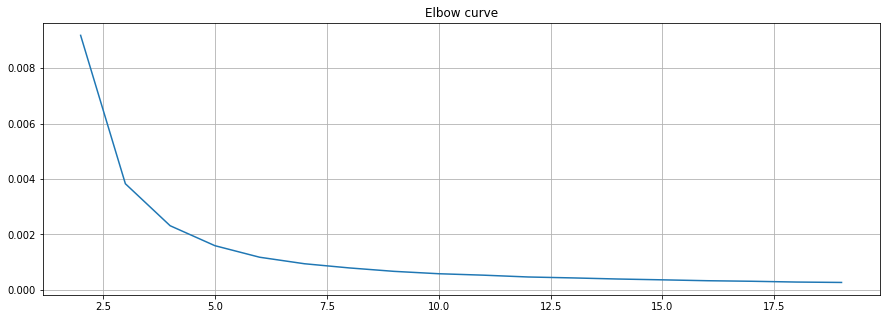

In [68]:
#format the data as a numpy array to feed into the K-Means algorithm
data1 = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

X = data1
distorsions = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

In [69]:
# So we can sort of see that once the number of clusters reaches 5 (on the bottom axis), the reduction in the SSE begins to slow down for each increase in cluster number. 
# This would lead me to believe that the optimal number of clusters for this exercise lies around the 5 mark – so let’s use 5.

In [70]:
# computing K-Means with K = 5 (5 clusters)
centroids,_ = kmeans(data1,5)

In [71]:
# assign each sample to a cluster
idx,_ = vq(data1,centroids)

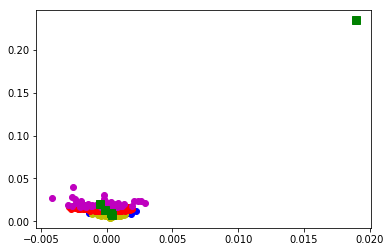

In [72]:
# some plotting using numpy's logical indexing
plot(data1[idx==0,0],data1[idx==0,1],'ob',
     data1[idx==1,0],data1[idx==1,1],'oy',
     data1[idx==2,0],data1[idx==2,1],'or',
     data1[idx==3,0],data1[idx==3,1],'og',
     data1[idx==4,0],data1[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

In [73]:
# Ok, so it looks like we have an outlier in the data which is skewing the results and making it difficult to actually see what is going on for all the other stocks. 
# Let’s take the easy route and just delete the outlier from our data set and run this again.

In [74]:
#identify the outlier
print(returns.idxmax())

Returns       NYSE.XRX
Volatility    NYSE.XRX
dtype: object


In [75]:
#drop the relevant stock from our data
returns.drop('NYSE.XRX',inplace=True)

#recreate data to feed into the algorithm
data1 = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

In [76]:
# computing K-Means with K = 5 (5 clusters)
centroids,_ = kmeans(data1,5)

In [77]:
# assign each sample to a cluster
idx,_ = vq(data1,centroids)

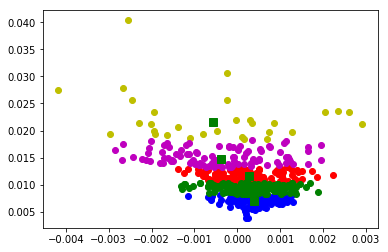

In [78]:
# some plotting using numpy's logical indexing
plot(data1[idx==0,0],data1[idx==0,1],'ob',
     data1[idx==1,0],data1[idx==1,1],'oy',
     data1[idx==2,0],data1[idx==2,1],'or',
     data1[idx==3,0],data1[idx==3,1],'og',
     data1[idx==4,0],data1[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

In [79]:
# gets us a much clearer visual representation of the clusters 
# Finally to get the details of which stock is actually in which cluster we can run the following line of code to carry out a 
# list comprehension to create a list of tuples in the (Stock Name, Cluster Number) format:

In [80]:
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]

for detail in details:
    print(detail)

('NASDAQ.AAL', 4)
('NASDAQ.AAPL', 3)
('NASDAQ.ADBE', 3)
('NASDAQ.ADI', 2)
('NASDAQ.ADP', 2)
('NASDAQ.ADSK', 4)
('NASDAQ.AKAM', 4)
('NASDAQ.ALXN', 4)
('NASDAQ.AMAT', 4)
('NASDAQ.AMD', 1)
('NASDAQ.AMGN', 3)
('NASDAQ.AMZN', 2)
('NASDAQ.ATVI', 2)
('NASDAQ.AVGO', 2)
('NASDAQ.BBBY', 4)
('NASDAQ.BIIB', 2)
('NASDAQ.CA', 4)
('NASDAQ.CBOE', 3)
('NASDAQ.CELG', 3)
('NASDAQ.CERN', 3)
('NASDAQ.CHRW', 2)
('NASDAQ.CHTR', 4)
('NASDAQ.CINF', 3)
('NASDAQ.CMCSA', 3)
('NASDAQ.CME', 3)
('NASDAQ.COST', 3)
('NASDAQ.CSCO', 3)
('NASDAQ.CSX', 2)
('NASDAQ.CTAS', 3)
('NASDAQ.CTSH', 0)
('NASDAQ.CTXS', 2)
('NASDAQ.DISCA', 4)
('NASDAQ.DISCK', 4)
('NASDAQ.DISH', 4)
('NASDAQ.DLTR', 4)
('NASDAQ.EA', 4)
('NASDAQ.EBAY', 2)
('NASDAQ.EQIX', 2)
('NASDAQ.ESRX', 4)
('NASDAQ.ETFC', 2)
('NASDAQ.EXPD', 3)
('NASDAQ.EXPE', 2)
('NASDAQ.FAST', 4)
('NASDAQ.FB', 3)
('NASDAQ.FFIV', 4)
('NASDAQ.FISV', 0)
('NASDAQ.FITB', 2)
('NASDAQ.FLIR', 2)
('NASDAQ.FOX', 2)
('NASDAQ.FOXA', 2)
('NASDAQ.GILD', 3)
('NASDAQ.GOOG', 3)
('NASDAQ.GOOGL', 3)
('